# Indian Pines

In [1]:
import numpy as np

from IPython.display import HTML
from collections import defaultdict

from sklearn_extra.cluster import KMedoids

from src.util.hsi import write_fixed_labels_mask
from src.data.indian_pines import load_indian_pines
from src.visualization.plot import plot_progress_animation
from src.definitions import RAW_DATA_FOLDER

In [2]:
random_seed = 42

In [3]:
features, labels = load_indian_pines()

In [4]:
_, _, image_c = features.shape

In [5]:
features_arr = features.reshape((-1, image_c))
labels_arr = labels.reshape(-1)

In [6]:
feature_index = {tuple(element): index for index, element in enumerate(features_arr)}

In [7]:
unique, counts = np.unique(labels, return_counts=True)

{u: c for u, c in zip(unique, counts)}

{0: 10776,
 1: 46,
 2: 1428,
 3: 830,
 4: 237,
 5: 483,
 6: 730,
 7: 28,
 8: 478,
 9: 20,
 10: 972,
 11: 2455,
 12: 593,
 13: 205,
 14: 1265,
 15: 386,
 16: 93}

In [8]:
cluster_count_per_class = {
    1: [1, 4, 8, 16, 20, 24, 30, 35],
    2: [16, 20, 24, 36, 56, 128, 256, 384, 512, 640, 768, 896, 1024, 1280],
    3: [16, 20, 24, 36, 56, 128, 256, 384, 512, 640, 768],
    4: [16, 20, 24, 36, 56, 128, 200],
    5: [16, 20, 24, 36, 56, 128, 256, 384],
    6: [16, 20, 24, 36, 56, 128, 256, 384, 512, 640],
    7: [1, 8, 16, 20, 24],
    8: [16, 24, 36, 56, 126, 256],
    9: [1, 4, 8, 12, 16, 18],
    10: [16, 20, 24, 36, 56, 128, 256, 384, 512, 640, 768, 896],
    11: [
        16,
        20,
        24,
        36,
        56,
        128,
        256,
        384,
        512,
        640,
        768,
        896,
        1024,
        1280,
        1536,
        1792,
        2048,
        2304,
    ],
    12: [16, 20, 24, 36, 56, 128, 256, 384, 512],
    13: [16, 20, 24, 36, 56, 128, 200],
    14: [16, 20, 24, 36, 56, 128, 256, 384, 512, 640, 768, 896, 1024],
    15: [16, 20, 24, 36, 56, 128, 256, 384],
    16: [16, 24, 36, 56, 64, 72, 80],
}

In [9]:
all_masks = defaultdict(lambda : defaultdict(np.ndarray))

for label, cluster_counts in cluster_count_per_class.items():
    for cluster_count in cluster_counts:
        features_by_label = features_arr[labels_arr == label]

        clustering = KMedoids(n_clusters=cluster_count, random_state=random_seed)

        clustering.fit(features_by_label)

        medoids = clustering.cluster_centers_

        mask = np.zeros_like(labels_arr)

        for medoid in medoids:
            medoid_index = feature_index[tuple(medoid)]

            mask[medoid_index] = 1

        all_masks[label][cluster_count] = mask.reshape(labels.shape)

        write_fixed_labels_mask(
            mask,
            f"indian-pines-k-medoids-{label}-{cluster_count}.npy",
            folder=RAW_DATA_FOLDER / "mask" / "k-medoids",
        )

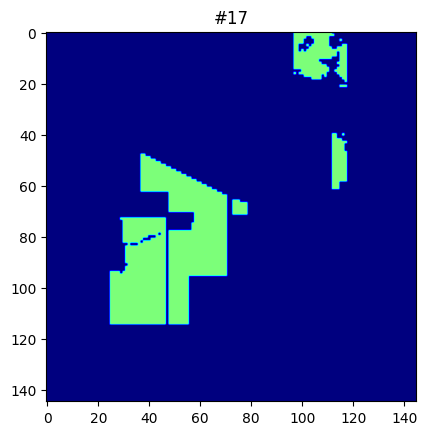

In [11]:
samples = [it for it in all_masks[11].values()]

ani = plot_progress_animation(samples, 2)

HTML(ani.to_jshtml())